In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss(m,x):
    #get y=a+b*exp((x-x0)^2/2sig^2)
    a=m[0]
    b=m[1]
    x0=m[2]
    sig=m[3]
    expvec=np.exp(-0.5*(x-x0)**2/sig**2)
    y=a+b*expvec
    derivs=np.empty([len(x),len(m)])
    derivs[:,0]= 1
    derivs[:,1]=expvec
    derivs[:,2]=b*(x-x0)*2/(2*sig**2)*expvec
    derivs[:,3]=b*(0.5*(x-x0)**2)*2/sig**3*expvec

    return y, derivs

def sinus(m,x):
    #get y= a+ b*sin(c*x)
    a = m[0]
    b = m[1]
    c = m[2]
    y = a + b*np.sin(c*x)
    derivs=np.empty([len(x),len(m)])
    derivs[:, 0] = 1
    derivs[:, 1] = np.sin(c*x)
    derivs[:, 2] = b * x * np.cos(c*x)
    return y, derivs

In [3]:
def update_dx(dx, status): #status must be a boolian
    if status:
        dx = dx *2
    else:
        dx = dx /2

In [4]:
def func2(m, x):
    #get y = a +b *(1/(x-x0))
    y = m[0] + m[1] *(1/(x-m[2]))
    derivs = np.empty([len(x),len(m)])
    derivs[:, 0] = 1
    derivs[:, 1] = (1/(x-m[2]))
    derivs[:, 2] =  m[1] * ((x-m[2])**2)
    
    return y, derivs

In [5]:
def local_dev(m, x, func, d = 10000): 
    m = np.array(m)
    y, derivs_a = func(m , x)
    derivs = np.zeros([len(x), len(m)])
    dpars = np.zeros(len(m))    
    dpars=m/d
    for i in range(len(m)):        
        pars_plus_1 = np.array(m, copy=True, dtype = 'float64')
        pars_plus_1[i] = pars_plus_1[i] + dpars[i]
        
        pars_plus_2 = np.array(m, copy=True, dtype = 'float64')
        pars_plus_2[i] = pars_plus_1[i] + 2* dpars[i]
        
        pars_minus_1 = np.array(m, copy=True, dtype = 'float64')
        pars_minus_1[i] = pars_plus_1[i] - dpars[i]
        
        pars_minus_2 = np.array(m, copy=True, dtype = 'float64')
        pars_minus_2[i] = pars_plus_1[i] - 2* dpars[i]
        
        #calculating the error
        third_deriv = (-0.5*func(pars_minus_2, x)[0] + func(pars_minus_1, x)[0] - func(pars_plus_1, x)[0] + 0.5*func(pars_plus_2, x)[0])/(dpars[i]**3)
        error = np.abs(func(m, x)[0] * np.finfo(np.double).eps / dpars[i] + third_deriv*(dpars[i]**2))
        
        A_plus, a = func(pars_plus_1 , x)
        A_minus, b = func(pars_minus_1 , x)
        A_m = (A_plus - A_minus)/(2*dpars[i])
        derivs[:, i] = A_m      
    return y, derivs_a, derivs, error

In [6]:
def func_ares (m, z, func, d = 10000): 
    #I can further change this function to include the best dx - 4*int(1E5) is the best number I found so far
    #m is the list of params 
    #z is the redshift range
    #y is the brightness temp
    m = np.array(m)
    y, derivs_a = func(m , x)
    derivs = np.zeros([len(z), len(m)])
    dpars = np.zeros(len(m))
    dpars = m/d 
    for i in range(len(m)):        
        pars_plus = np.array(m, copy=True, dtype = 'float64')
        pars_plus[i] = pars_plus[i] + dpars[i]
        
        pars_minus = np.array(m, copy=True, dtype = 'float64')
        pars_minus[i] = pars_minus[i] - dpars[i]
        
        A_plus, a = func(pars_plus , x)
        A_minus, b = func(pars_minus , x)
        A_m = (A_plus - A_minus)/(2*dpars[i])
        derivs[:, i] = A_m    
    return y, derivs_a, derivs

In [7]:
m = [1, 2, 50, 2]
#m = [1, 2, 5]
x = np.linspace(1, 100, 100)
y, derivs_a, derivs = func_ares(m , x, gauss)

In [8]:
np.mean(derivs_a - derivs)

2.9251191071485725e-14

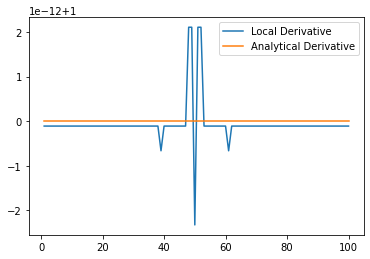

In [9]:
plt.plot(x, derivs[:, 0], label='Local Derivative')
plt.plot(x, derivs_a[:, 0], label = 'Analytical Derivative')
plt.legend()
plt.show()